<a href="https://colab.research.google.com/github/soyoonjeong/MachineLearning/blob/main/7_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-평균 알고리즘 이해

: 군집 중심점을 선택된 포인트의 평균 지점으로 이동 -> 이동된 중심점에서 다시 가까운 포인트를 선택 -> 중심점을 평균지점으로 이동 -> ...

<img src = "https://img1.daumcdn.net/thumb/R1280x0.fjpg/?fname=http://t1.daumcdn.net/brunch/service/user/8fdM/image/YxUA7B2IFH-tFi8ItQjEqxAU9lM">

장점 
- 가장 많이 활용
- 쉽고 간결

단점
- 거리 기반 알고리즘, 속성의 개수가 많을 경우 군집화의 정확도 떨어짐
- 반복 횟수 많을 경우 수행 시간 느려짐 

## 사이킷런 KMeans 클래스 소개 

파라미터 
- n_clusters : 군집 중심점의 개수
- init : 초기 군집 중심점의 좌표를 설정할 방식, k-means++
- max_iters : 최대 반복 횟수

주요 속성
- labels : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표 

## K-평균을 이용한 붓꽃 데이터 세트 군집화 

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


군집화 

In [ ]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


실제 붓꽃 품종 분류값과 얼마나 차이가 나는지 군집화가 효과적으로 됐는지 확인 

In [ ]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


군집화 시각화 

In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


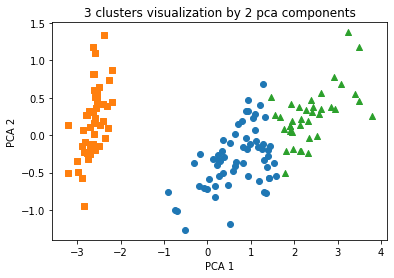

In [ ]:
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

plt.scatter(x = irisDF.loc[marker0_ind, 'pca_x'], y = irisDF.loc[marker0_ind, 'pca_y'], marker = 'o')
plt.scatter(x = irisDF.loc[marker1_ind, 'pca_x'], y = irisDF.loc[marker1_ind, 'pca_y'], marker = 's')
plt.scatter(x = irisDF.loc[marker2_ind, 'pca_x'], y = irisDF.loc[marker2_ind, 'pca_y'], marker = '^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters visualization by 2 pca components')
plt.show()

## 군집화 알고리즘 테스트를 위한 데이터 생성 

make_blobs(), make_classification(), make_circle(), make_moon()

make_blobs() 호출 파라미터
- n_samples : 데이터 개수
- n_features : 데이터 피처 개수 
- centers : 군집의 개수
- cluster_std : 생성될 군집 데이터의 표준 편차 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state =0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


ㄴ> 피처 2개로 잘 구성되었고 타깃은 0,1,2 세 종류로 고루 분포되었음음

In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


make_blobs()로 만든 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인 

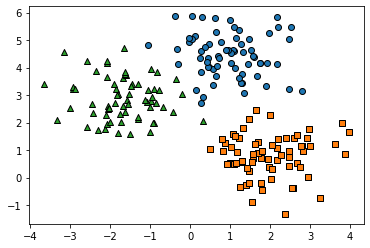

In [ ]:
target_list = np.unique(y)

markers = ['o','s','^','P','D','H','x']

for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], edgecolor = 'k',marker = markers[target])
plt.show()


데이터 세트에 KMeans 군집화 실행 후 군집별 시각화 

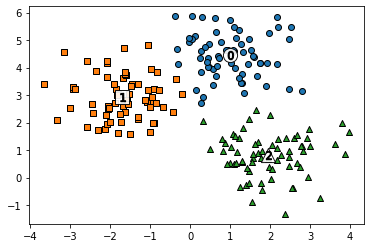

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label] 
  center_x_y = centers[label]
  plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', marker = markers[label])

  plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white',alpha = 0.9, edgecolor='k', marker = markers[label])
  plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k',edgecolor='k', marker = '$%d$'%label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


# 군집평가

PROBLEM : 군집화는 평가하기 어려움
- 비교할만한 타깃 레이블 없음
- 데이터 내에 숨어 있는 별도의 그룹 찾아서 의미 부여
- 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화 추구
- 서로 다른 분류 값의 데이터를 더 넓은 군집화 레벨화화

## 실루엣 분석의 개요요

SOLUTION : 실루엣 분석

: 간 군집간의 거리가 얼마나 효율적으로 분리돼 있는지 (얼마나 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐있는지)

**실루엣 계수** : 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼있고 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼있는지 (-1~1)

1에 가까울수록 근처의 군집과 멀리 떨어져 있는 것, 0에 가까울수록 근처의 군집과 가까운 것, -이면 다른 군집에 할당되어 있는 것 

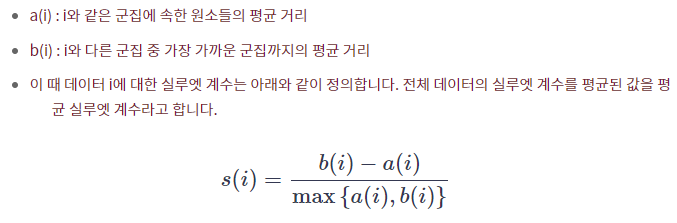

- sklearn.metrics.silhouette_samples() : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값 입력 -> 각 데이터 포인트의 실루엣 계수 반환
- sklearn.metrics.silhouette_score() : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값 입력 -> 전체 데이터의 실루엣 계수 값 반환환 

좋은 군집화가 되려면
- 전체 실루엣 계수 평균값이 1에 가까워야 함
- 개별 군집의 평균값 편차가 크지 않아야 함 

## 붓꽃 데이터 세트를 이용한 군집 평가

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print("silhouette_samples() return 값의 shape : ", score_samples.shape)

irisDF['silhouette_coeff'] = score_samples

average_score = silhouette_score(iris.data, irisDF['cluster'])
print("붓꽃 데이터셋 silhouette score : {0:3f}".format(average_score))

irisDF.head(3)

silhouette_samples() return 값의 shape :  (150,)
붓꽃 데이터셋 silhouette score : 0.552819


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


전체 평균 실루엣 계수는 0.5528로 낮은데 군집 1의 실루엣 계수는 0.8로 높음

In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

군집 1만 평균 실루엣 계수 높고 나머지 군집의 실루엣 계수는 낮음 => 좋은 군집화라고 볼 수 없음 

## 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법 

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

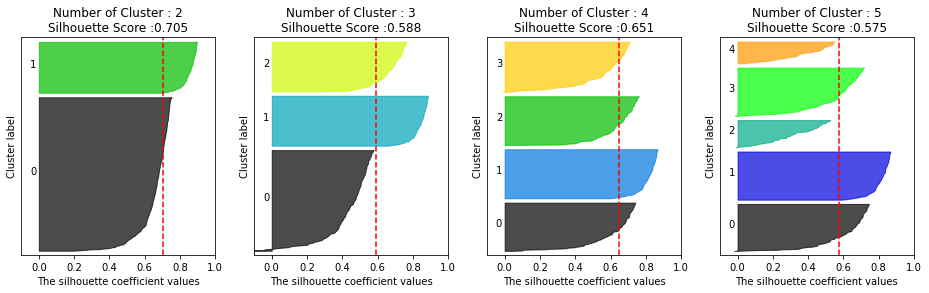

In [ ]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

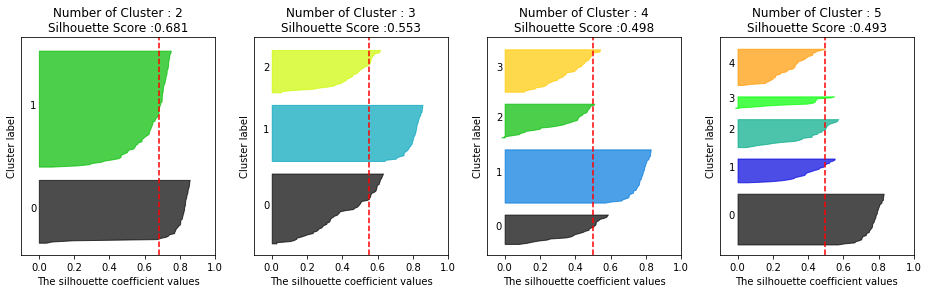

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

# 평균 이동

## 평균 이동(Mean Shift)의 개요

군집의 중심을 데이터가 모여 있는 밀도가 가장 높은 곳(확률 밀도 함수 피크)으로 지속적으로 이동시킴 

=> 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 <br>주변 데이터와의 거리 값을 KDE(Kernel Density Estimation) 함수 값으로 입력한 뒤, 그 반환 값을 현재 위치에서 업데이트하면서 이동 

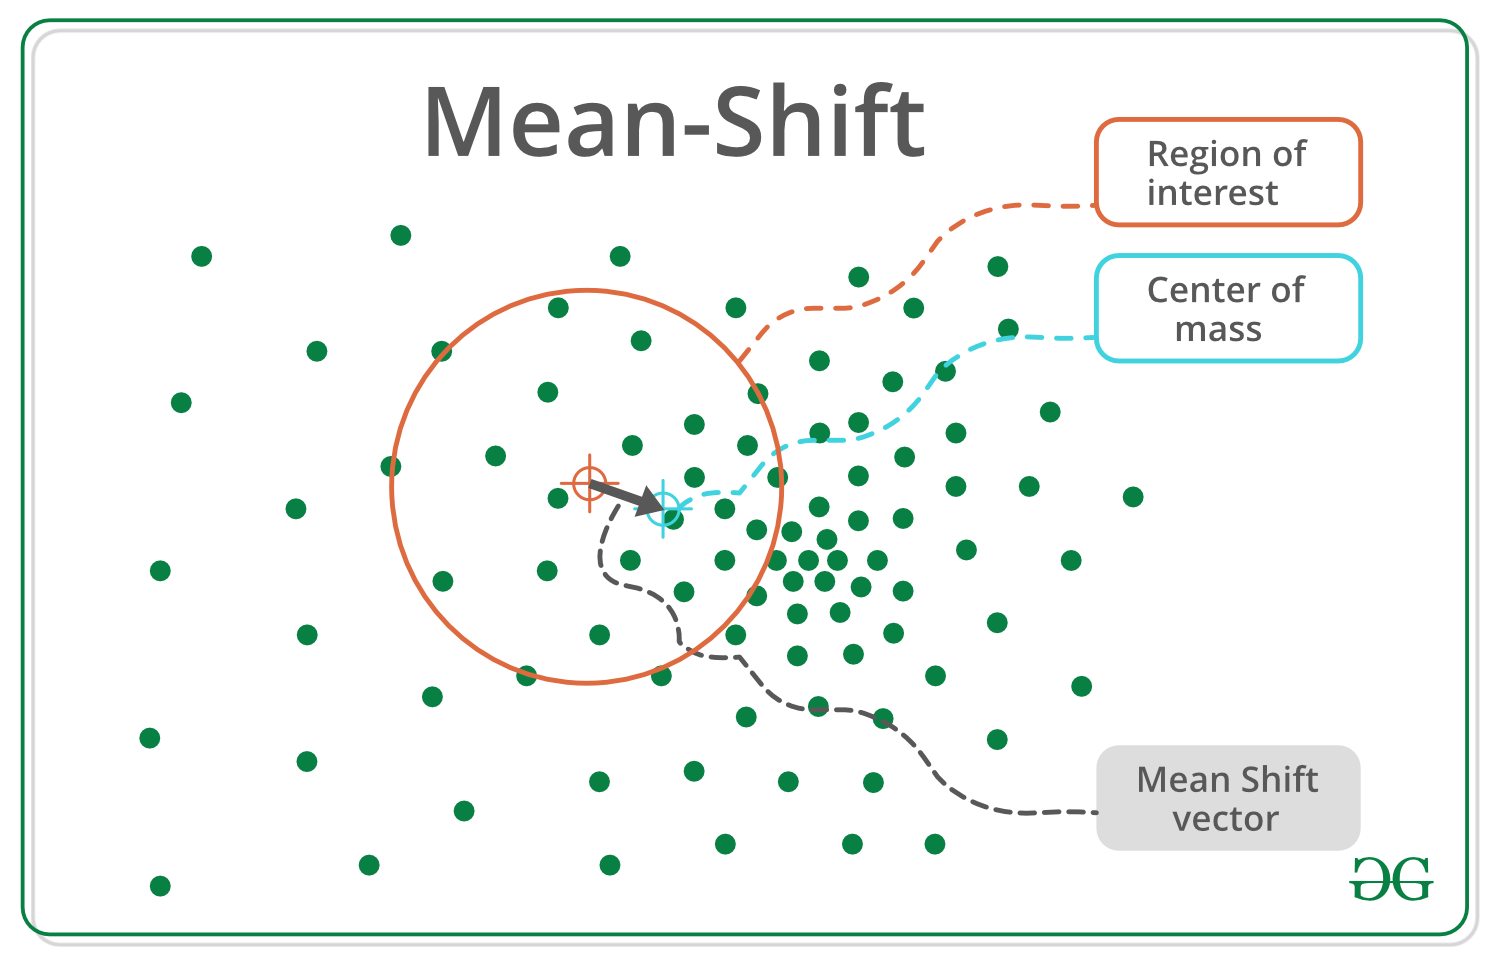

1. 개별 데이터의 특정 반경 내에 주변 데이터를 포함한 데이터 분포도를 KDE 기반의 Mean Shift 알고리즘으로 계산
2. KDE로 계산된 데이터 분포도가 높은 방향으로 데이터 이동
3. 1~2단계를 모든 데이터가 수행하면서 데이터 이동, 군집 중심점으로 모임
4. 지정 반복 횟수만큼 전체 데이터에 대해 KDE 기반으로 데이터 이동시키면서 군집화 수행
5. 군집 중심점 설정정

**KDE(Kernel Density Estimation)** 
: 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눔 => 확률 밀도 함수 추정 

대표적 커널 함수 : 가우시안 분포 함수 

대역폭(bandwidth)
- 작은 대역폭 : 좁고 뾰족한 KDE, 과적합, 많은 수의 군집 중심점
- 큰 대역폭 : 과도하게 평활화된 KDE, 과소적합, 적은 수의 군집 중심점 

평균 이동의 장점
- 데이터 세트의 형태나 특정 분포도 기반의 모델로 가정하지 않기 때문에 유연한 군집화 가능
- 이상치의 영향력 크지 않음
- 군집 개수 정할 필요 없음

평균 이동의 단점
- 수행 시간이 오래 걸림
- bandwidth 의 영향 큼 

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.7, random_state = 0)

meanshift = MeanShift(bandwidth = 0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ',np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2 3 4 5]


ㄴ> bandwidth ⬇ : 군집 중심점 ⬆

In [ ]:
meanshift = MeanShift(bandwidth = 1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ',np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


ㄴ> bandwidth ⬆ : 군집 중심점 ⬇

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X) # 최적의 대역폭 bandwidth 찾아주는 함수 
print('bandwidth 값 :', bandwidth)

bandwidth 값 : 1.8158484154517098


In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels 유형 : ", np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


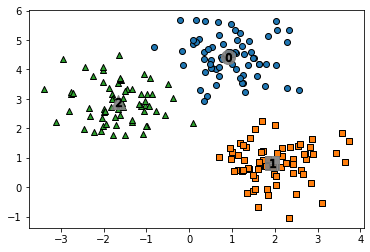

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','x','*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y = centers[label]
  plt.scatter(x = label_cluster['ftr1'],y = label_cluster['ftr2'], edgecolor = 'k',marker = markers[label])

  plt.scatter(x = center_x_y[0], y= center_x_y[1],s =200,color = 'gray', alpha = 0.9, marker = markers[label])
  plt.scatter(x = center_x_y[0], y= center_x_y[1],s =70,color = 'k',edgecolor = 'k', marker = '$%d$'%label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64
